In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
movies_df = pd.read_csv('movie.csv')
ratings_df = pd.read_csv('rating.csv')

df = pd.merge(movies_df, ratings_df, on ='movieId')
# Drop the column 'genres' as we are not interested in it on this project
df.drop(['genres'],axis=1,inplace=True)
print(df.head())

   movieId             title  userId  rating            timestamp
0        1  Toy Story (1995)       3     4.0  1999-12-11 13:36:47
1        1  Toy Story (1995)       6     5.0  1997-03-13 17:50:52
2        1  Toy Story (1995)       8     4.0  1996-06-05 13:37:51
3        1  Toy Story (1995)      10     4.0  1999-11-25 02:44:47
4        1  Toy Story (1995)      11     4.5  2009-01-02 01:13:41


In [4]:
# Filter the columns we are interested in analysing
rating = df.loc[:,["userId","movieId","rating"]]
rating.columns
print(rating.head())

   userId  movieId  rating
0       3        1     4.0
1       6        1     5.0
2       8        1     4.0
3      10        1     4.0
4      11        1     4.5


In [5]:
rating.shape

(20000263, 3)

In [8]:
# Concept : Always split your data set into Training, Testing and Validation
df = df.iloc[:1000000]
# Basic statistics of our dataset
df.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.00000
mean,52.248951,69132.673651,3.56875
std,41.348656,40016.765553,1.05202
min,1.000000,1.000000,0.50000
25%,19.000000,34437.000000,3.00000
50%,42.000000,69262.500000,4.00000
75%,88.000000,103680.000000,4.00000
max,147.000000,138493.000000,5.00000


In [12]:
# Group By title and sort the ratings for each movie title
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Usual Suspects, The (1995)                   4.334372
Taxi Driver (1976)                           4.110576
Persuasion (1995)                            4.057546
Seven (a.k.a. Se7en) (1995)                  4.053493
Braveheart (1995)                            4.042534
                                               ...   
NeverEnding Story III, The (1994)            2.312137
Lawnmower Man 2: Beyond Cyberspace (1996)    2.144243
Gospa (1995)                                 2.142857
Headless Body in Topless Bar (1995)          2.062500
Kids of the Round Table (1995)               1.871429
Name: rating, Length: 146, dtype: float64

In [13]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Braveheart (1995)                            53769
Toy Story (1995)                             49695
Usual Suspects, The (1995)                   47006
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    44980
Seven (a.k.a. Se7en) (1995)                  43249
                                             ...  
Sonic Outlaws (1995)                            36
Guardian Angel (1994)                           27
Nueba Yol (1995)                                19
Headless Body in Topless Bar (1995)             16
Gospa (1995)                                    14
Name: rating, Length: 146, dtype: int64

In [14]:
# Create a DF for ratings
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings'] = pd.DataFrame(df.groupby("title").count()["rating"])

print(ratings.head())


                                         rating  number of ratings
title                                                             
Ace Ventura: When Nature Calls (1995)  2.607412              20938
Across the Sea of Time (1995)          3.017647                 85
Amazing Panda Adventure, The (1995)    2.912069                580
American President, The (1995)         3.667713              18162
Angela (1995)                          3.115385                 39


In [15]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
"Usual Suspects, The (1995)",4.334372,47006
Taxi Driver (1976),4.110576,24481
Persuasion (1995),4.057546,3154
Seven (a.k.a. Se7en) (1995),4.053493,43249
Braveheart (1995),4.042534,53769
...,...,...
"NeverEnding Story III, The (1994)",2.312137,1376
Lawnmower Man 2: Beyond Cyberspace (1996),2.144243,2371
Gospa (1995),2.142857,14


In [16]:
ratings.describe()

,rating,number of ratings
count,146.000000,146.000000
mean,3.282091,6849.315068
std,0.464475,10554.093747
min,1.871429,14.000000
25%,3.056590,576.250000
50%,3.310810,2545.000000
75%,3.584594,8382.750000
max,4.334372,53769.000000


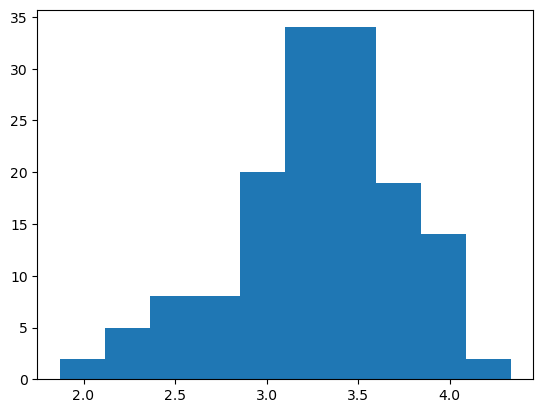

In [17]:
plt.hist(ratings['rating'])
plt.show()
# It is conclusive that there anren't any movies with a rating of 5

<function matplotlib.pyplot.show(close=None, block=None)>

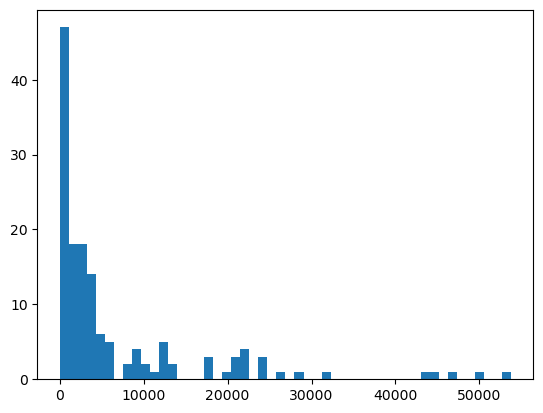

In [157]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

## Recommendation System

In [18]:
pivot_table = df.pivot_table(index=["userId"], columns=["title"], values ="rating")
pivot_table.head(5)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Function to recommend a movie with their correlation score. Note that higher the correlation more the movie related to each other
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()


In [21]:
recommend_movie('Jumanji (1995)')

title
Jumanji (1995)         1.000000
Gospa (1995)           0.773574
Target (1995)          0.636314
Catwalk (1996)         0.511840
It Takes Two (1995)    0.480742
dtype: float64

In [24]:
recommend_movie("Unforgettable (1996)")

title
Unforgettable (1996)                          1.000000
Nobody Loves Me (Keiner liebt mich) (1994)    0.970725
Headless Body in Topless Bar (1995)           0.960769
Target (1995)                                 0.923381
Shadows (Cienie) (1988)                       0.804476
dtype: float64

To DIY : Pick a movie from the dataset and use the above function to get a recommendation. Make sure to use the exact string as the title name in the dataset. Feel free to modify the dataset as you wish, but make sure to fill in all the columns.